In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import seaborn as sns
import string
from wordcloud import WordCloud
from collections import Counter
import pickle

In [2]:
df = pd.read_csv('Data/spam_utf.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5572, 38)

1. Data Cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement

# **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   v1           5572 non-null   object
 1   v2           5571 non-null   object
 2   Unnamed: 2   255 non-null    object
 3   Unnamed: 3   167 non-null    object
 4   Unnamed: 4   32 non-null     object
 5   Unnamed: 5   23 non-null     object
 6   Unnamed: 6   10 non-null     object
 7   Unnamed: 7   10 non-null     object
 8   Unnamed: 8   5 non-null      object
 9   Unnamed: 9   4 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
 12  Unnamed: 12  1 non-null      object
 13  Unnamed: 13  1 non-null      object
 14  Unnamed: 14  1 non-null      object
 15  Unnamed: 15  1 non-null      object
 16  Unnamed: 16  1 non-null      object
 17  Unnamed: 17  1 non-null      object
 18  Unnamed: 18  1 non-null      object
 19  Unnamed: 19  1 non-null    

drop all the columns except 1st 2

In [6]:
cols = df.columns
cols[2:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

In [7]:
df.drop(columns=cols[2:], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Label Encoding target feature

In [10]:
encoder = LabelEncoder()

In [11]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

Here ham:0 and spam:1

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Null Values

In [14]:
df.isnull().sum()

target    0
text      1
dtype: int64

In [15]:
df[df.isna().any(axis=1)]

,target,text
3035,0,NaN


In [16]:
df.drop(df[df.isna().any(axis=1)].index, inplace=True)

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

## Duplicated Values

In [18]:
df.duplicated().sum()

np.int64(408)

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5163, 2)

# **EDA**

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4510
1     653
Name: count, dtype: int64

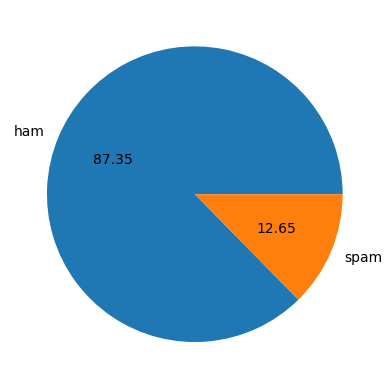

In [24]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

**Data is imbalanced**

## Num of characters

In [25]:
df['num_char']=df['text'].str.len()

/tmp/ipykernel_211823/2516431525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].str.len()


In [26]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Num of words

In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_211823/1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipykernel_211823/754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df.describe()

,target,num_char,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.126477,77.383498,17.949448,1.944218
std,0.332418,57.130981,12.802888,1.355741
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,35.000000,9.000000,1.000000
50%,0.000000,59.000000,14.000000,1.000000
75%,0.000000,114.000000,26.000000,2.000000
max,1.000000,910.000000,196.000000,18.000000


In [32]:
df[df['target']==0].describe()

,target,num_char,num_words,num_sentences
count,4510.0,4510.000000,4510.000000,4510.000000
mean,0.0,68.688248,16.542129,1.794457
std,0.0,54.838171,12.839089,1.266669
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,51.000000,13.000000,1.000000
75%,0.0,88.000000,21.000000,2.000000
max,0.0,910.000000,196.000000,18.000000


In [33]:
df[df['target']==1].describe()

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.437979,27.669219,2.978560
std,0.0,30.154681,7.030450,1.493185
min,1.0,13.000000,2.000000,1.000000
25%,1.0,131.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

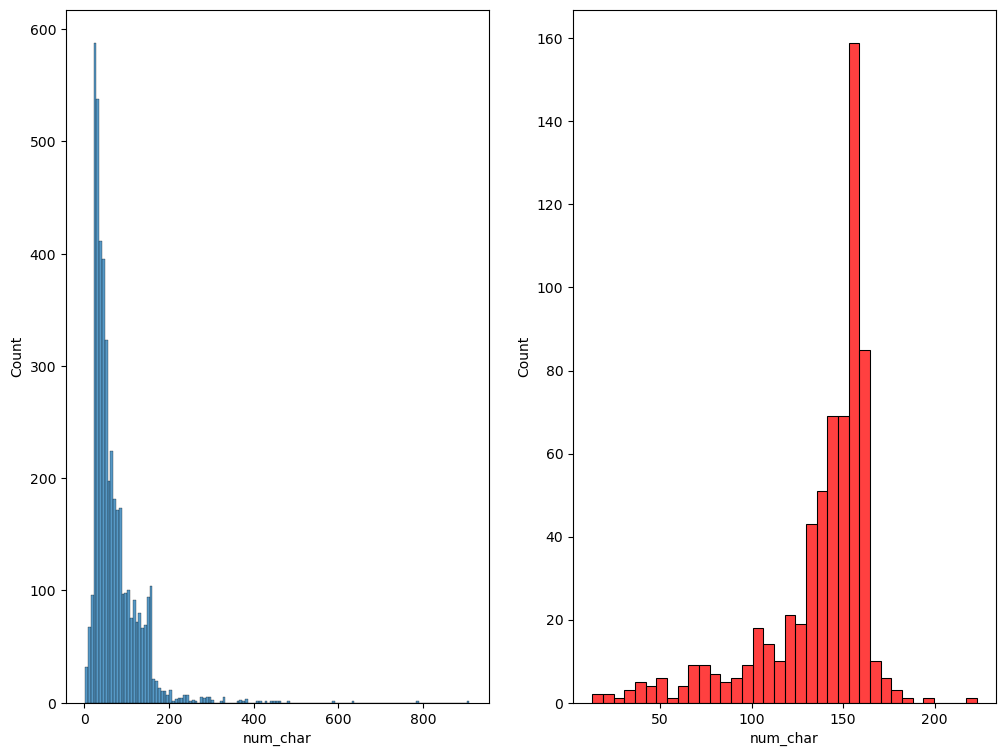

In [34]:

fig, axe = plt.subplots(1,2, figsize=(12,9))
sns.histplot(df[df['target']==0]['num_char'],ax=axe[0])
sns.histplot(df[df['target']==1]['num_char'],color='red', ax=axe[1])

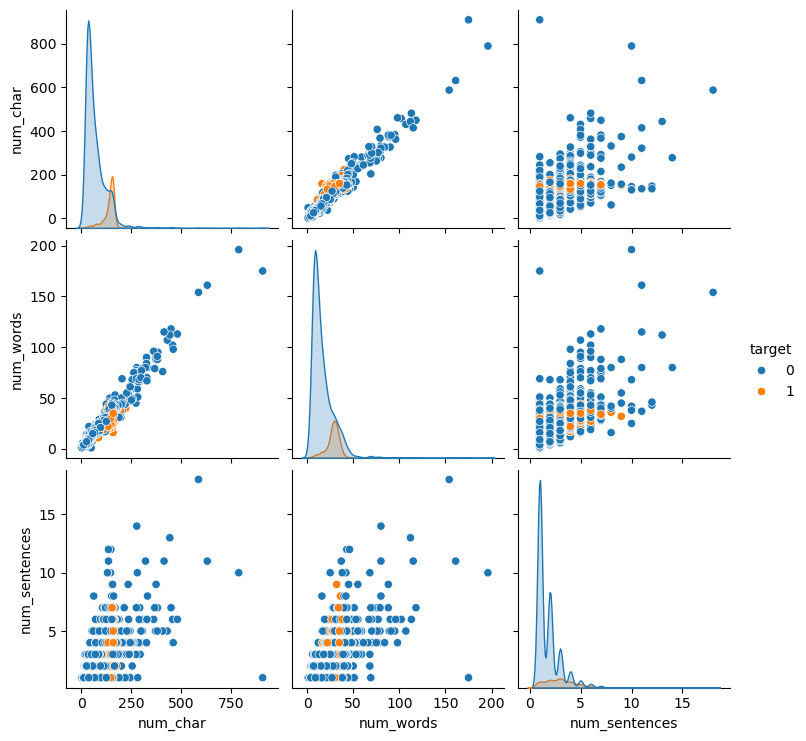

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

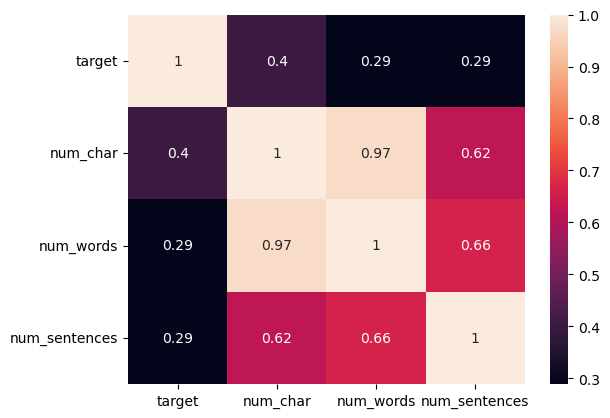

In [36]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# **Data Preprocessing**
1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    ps = PorterStemmer()
    
    filtered_text = [ps.stem(token) for token in text if token.isalnum() and token not in stopwords.words('english')]
     
    return ' '.join(filtered_text)

In [38]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)
df

/tmp/ipykernel_211823/1835954565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Word Cloud

In [42]:
wc = WordCloud()

In [43]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

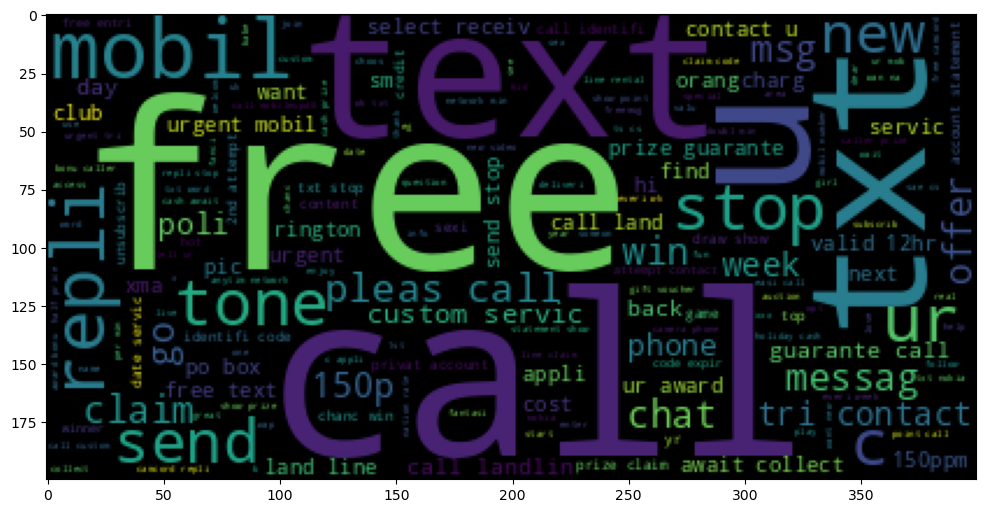

In [44]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df.loc[df['target']==0,'transformed_text'].str.cat(sep=" "))

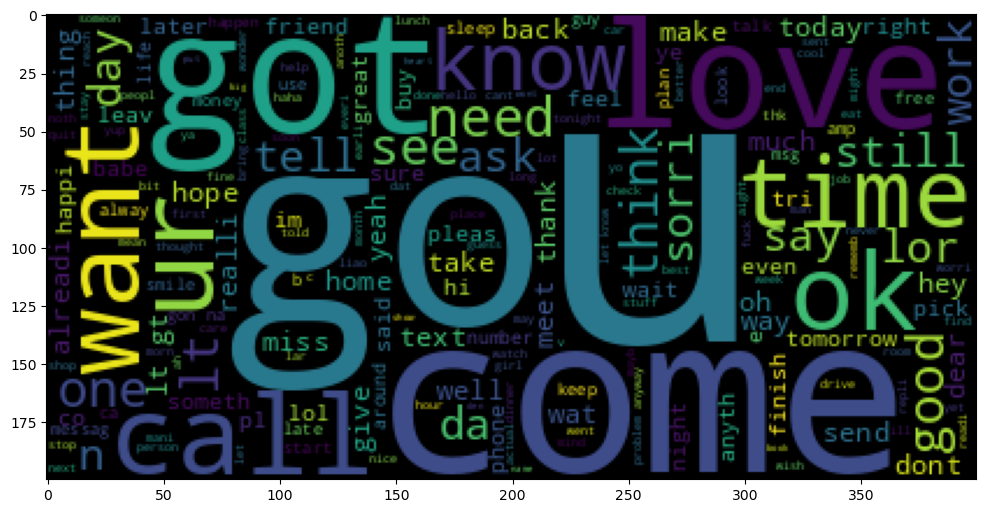

In [46]:
plt.figure(figsize=(12,9))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9938

In [50]:
Counter(spam_corpus) # creates a dictionary of word counts

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

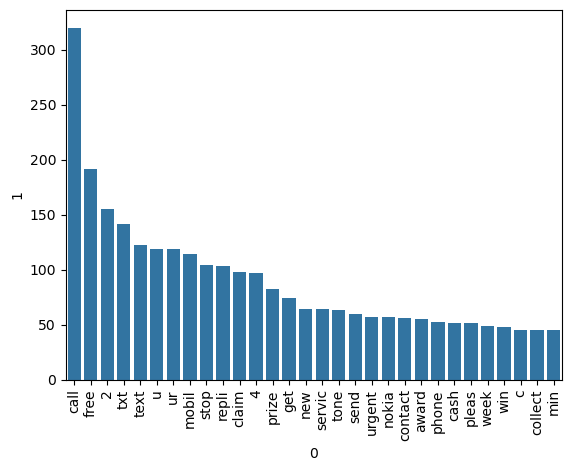

In [51]:
spam_top_30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = spam_top_30[0], y = spam_top_30[1])
plt.xticks(rotation='vertical') # makes the xticks vertical
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
ham_top_30 = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_top_30

,0,1
0,u,865
1,go,400
2,get,340
3,2,280
4,come,271
5,lt,238
6,got,233
7,know,233
8,like,229
9,call,229


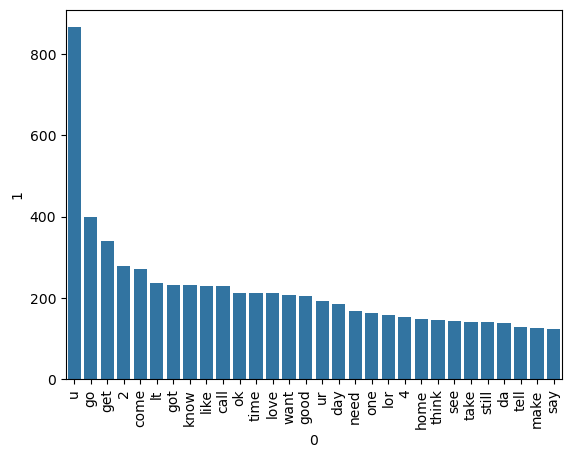

In [54]:
sns.barplot(x=ham_top_30[0], y = ham_top_30[1])
plt.xticks(rotation='vertical')
plt.show()

# **4. Model Building**

## CountVectorizer(Bag of words)

In [55]:
cv = CountVectorizer()
gnb = GaussianNB()
mnb = MultinomialNB()

In [56]:
X = cv.fit_transform(df['transformed_text']).toarray() # applying Bag for words algorithm X

In [57]:
X.shape

(5163, 6562)

In [58]:
y = df['target'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=2)

### Gaussian Naive Bayes

In [60]:
y_pred = gnb.fit(X_train,y_train).predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1549,))

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Gaussian Naiva Bayes: ")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(matrix)

Gaussian Naiva Bayes: 
accuracy: 0.8715300193673338
precision: 0.5029761904761905
[[1181  167]
 [  32  169]]


### Multinomial Naive Baiyes

In [62]:
y_pred = mnb.fit(X_train,y_train).predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1549,))

In [63]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Multinomial Naiva Bayes: ")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(matrix)


Multinomial Naiva Bayes: 
accuracy: 0.972885732730794
precision: 0.8994974874371859
[[1328   20]
 [  22  179]]


## Lets try with Tfidf vectorizer

### Gaussian Naive Bayes

In [64]:
tfidf = TfidfVectorizer()

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5163, 6562))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=3)

In [67]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1549, 6562))

In [68]:
X_test.shape

(1549, 6562)

In [69]:
y_pred = gnb.fit(X_train,y_train).predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(1549,))

In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Gaussian Naiva Bayes: ")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(matrix)

Gaussian Naiva Bayes: 
accuracy: 0.8676565526145901
precision: 0.49709302325581395
[[1173  173]
 [  32  171]]


### Multinomial Naive Bayes

In [71]:
MnNB_model = mnb.fit(X_train,y_train)
y_pred = MnNB_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1549,))

In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Multinomial Naiva Bayes: ")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(matrix)

Multinomial Naiva Bayes: 
accuracy: 0.9561007101355713
precision: 1.0
[[1346    0]
 [  68  135]]


# **Save the Model**

In [73]:
with open("model.pkl","wb") as model_file:
    pickle.dump(MnNB_model,model_file)

In [74]:
with open("vectorizer.pkl","wb") as vectorizer:
    pickle.dump(tfidf,vectorizer)